In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from funciones_auxiliares import *
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# 4.4 Análisis exploratorio de *estadísticas avanzadas individuales*

En el siguiente notebook, se pasa a realizar el análisis exploratorio de los datos procesados referentes a las *estadísticas totales de quintetos*. Este análisis exploratorio estará dividido en los siguientes apartados con el fin de poder comprender y conocer los datos que han sido descargados y transformados:
* **1. Análisis de consistencia de los datos.** Se realizará el análisis de volumetrías referentes a los datos descargados con el fin de tener una imagen global de estos.
* **2. Análisis univariante de los datos.** Se realizará una análisis de cada una de las variables para conocer la información que esta almacena y la distribución de esta dentro de la variable.
* **3. Conclusiones.** Se cerrará el documento destacando los puntos más relevantes tras la realización del análisis.

A través de estos puntos se espere conocer por completo la informaición que se tiene para el cumplimiento de los objetivos del Trabajo Fin de Máster.

## 1. Análisis de consistencia de los datos

En el análisis de consistencia de los datos se buscará concocer la estructura de estos y la información que en su variables se almacena. Es por este motivo que se pasa a realiza la construcción de un dataframe con todos los registros de los quintetos en el que se almacenen estadísticas totales de quintetos:

*NOTA: Con respecto a las estadísticas de quintetos de la temporada 2019 estas no han podido ser procesadas debidoa  la falta de consistencia en los datos. Por lo tanto, quedarán excluidas de este análisis*

In [7]:
# Ruta de estadísticas
ruta_estadisticas = 'E:/TFM/02. Datos/ACB/ESTADISTICAS'

# Se realiza la inicialización del tablon de estadísticas
df_estadisticas_totales = pd.DataFrame()

# Se extrae el listado de directorios de temporadas
l_dir_temporadas = ['2019','2020', '2021', '2022']

for temporada in l_dir_temporadas:
    # Se extrae el listado de directorios de equipos
    ruta_dir_temporada = ruta_estadisticas + '/' + temporada
    l_dir_equipos = os.listdir(ruta_dir_temporada)
    
    for equipo in l_dir_equipos:
        # Se inicializa la ruta de estadísticas de un equipo
        ruta_dir_estadisticas_equipo = ruta_dir_temporada + '/' + equipo
        
        # Se realiza la carga de ficheros de estadísticas de jugadores
        df_estadisticas_totales_equipo = pd.read_csv(ruta_dir_estadisticas_equipo + '/04_ESTADISTICAS_AVANZADAS.csv', sep = ';')
        
        # Se incluye el fichero cargado en el dataframe de estadísticas totales
        df_estadisticas_totales = pd.concat([df_estadisticas_totales,df_estadisticas_totales_equipo])
df_estadisticas_totales = df_estadisticas_totales.replace(float('inf'), 0)        

Tras la construccion del fichero global con las estadísticas totales de los jugadores, se pasa a realizar la extracción de volumetrías del conjunto de datos:

In [8]:
print("#######################################")
print("# RESUMEN DEL TABLÓN DE ESTADISTICAS")
print("#######################################")
print("Nº de registros:",df_estadisticas_totales.shape[0])
print("Nº de columnas:",df_estadisticas_totales.shape[1])
print("Columnas:", (' | ').join(df_estadisticas_totales.columns))
print("Nº de elementos vacíos:",(df_estadisticas_totales=='').sum().sum())
print("Nº de elementos nulos:",df_estadisticas_totales[df_estadisticas_totales.columns].isna().sum().sum())
print("\n",df_estadisticas_totales.head().to_string(index=False, col_space=4))

#######################################
# RESUMEN DEL TABLÓN DE ESTADISTICAS
#######################################
Nº de registros: 1353
Nº de columnas: 13
Columnas: NO. | JUGADOR | eFG% | 3Pr | FTr | ORB% | DRB% | STL% | BLK% | TOV% | AST% | USG% | STOP%
Nº de elementos vacíos: 0
Nº de elementos nulos: 0

  NO.     JUGADOR   eFG%    3Pr    FTr   ORB%   DRB%   STL%   BLK%   TOV%   AST%   USG%  STOP%
   0   B. Davies 0.5667 0.1095 0.4952 0.1144 0.1995 0.0249 0.0252 0.1611 0.0451 0.2721 0.6031
  10    R. Smits 0.4674 0.5652 0.2391 0.0648 0.1347 0.0290 0.0065 0.1229 0.0327 0.1618 0.5069
  13  T. Heurtel 0.5000 0.4386 0.2105 0.0000 0.1493 0.0237 0.0000 0.2638 0.2363 0.2476 0.4788
  14 A. Pustovyi 0.7647 0.0000 0.5882 0.1943 0.1197 0.0086 0.0348 0.1252 0.0373 0.1820 0.4663
  18   P. Oriola 0.5966 0.3361 0.4622 0.1398 0.2161 0.0107 0.0043 0.1508 0.0347 0.1544 0.4970


Como se puede observar, el número de registros de estadísticas totales de jugadores es de 1.353 que dan información a 13 variables diferentes como ya se había observado durante el procesamiento de este tipo de estadística. Con respecto a la estructura de los datos que esta variable almacena, de manera genérica, podemos observar todas las variables estadísticas son de tipo numérico y que en ninguna de ellas existe presencia de elementos nulos ni vacíos.

## 2. Análisis univariante de los datos.

Tras la inspección de manera general todos los registros en los que se almacena información referente a las estadísticas totales, se pasa a realizar el análisis univariante de cada una de ellas para conocer su estructura y el tipo de información que en estas variables se almacena:

### 2.1 Variable *eFG%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 854
Media de la variable: 0.4628328159645233
Mediana de la variable: 0.5102
Desviación típica de la variable: 0.203992515349867
Valor mínimo: 0.0
Valor máximo: 1.5


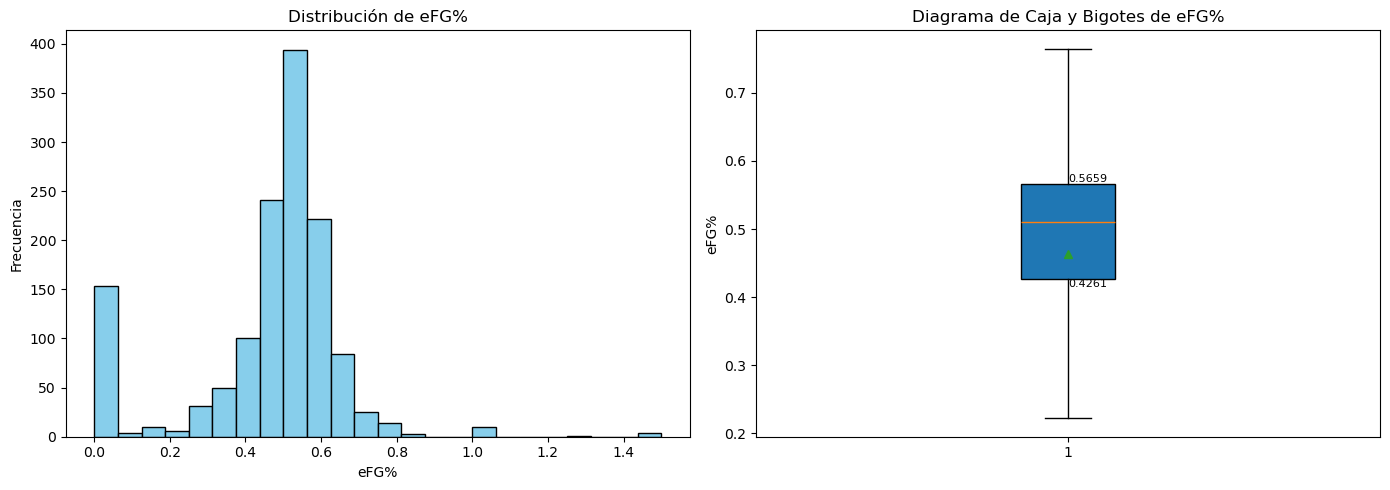

In [9]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'eFG%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.2 Variable *3Pr*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 849
Media de la variable: 0.37263037694013307
Mediana de la variable: 0.4031
Desviación típica de la variable: 0.25915727153921014
Valor mínimo: 0.0
Valor máximo: 1.0


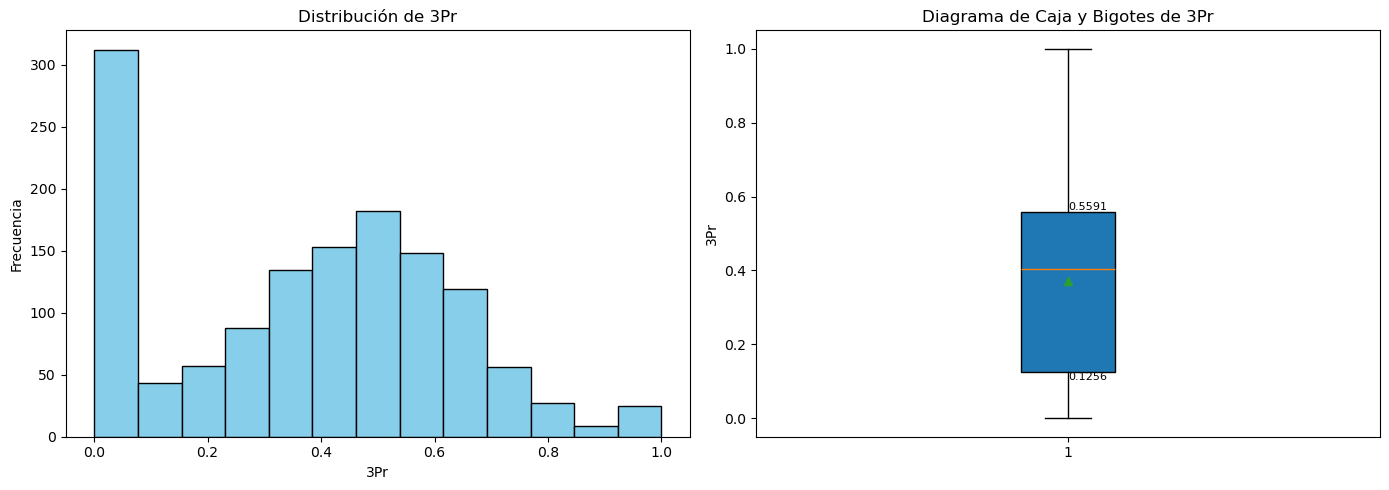

In [10]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = '3Pr'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.3 Variable *FTr*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 861
Media de la variable: 0.26682697708795267
Mediana de la variable: 0.2439
Desviación típica de la variable: 0.232111025714818
Valor mínimo: 0.0
Valor máximo: 4.0


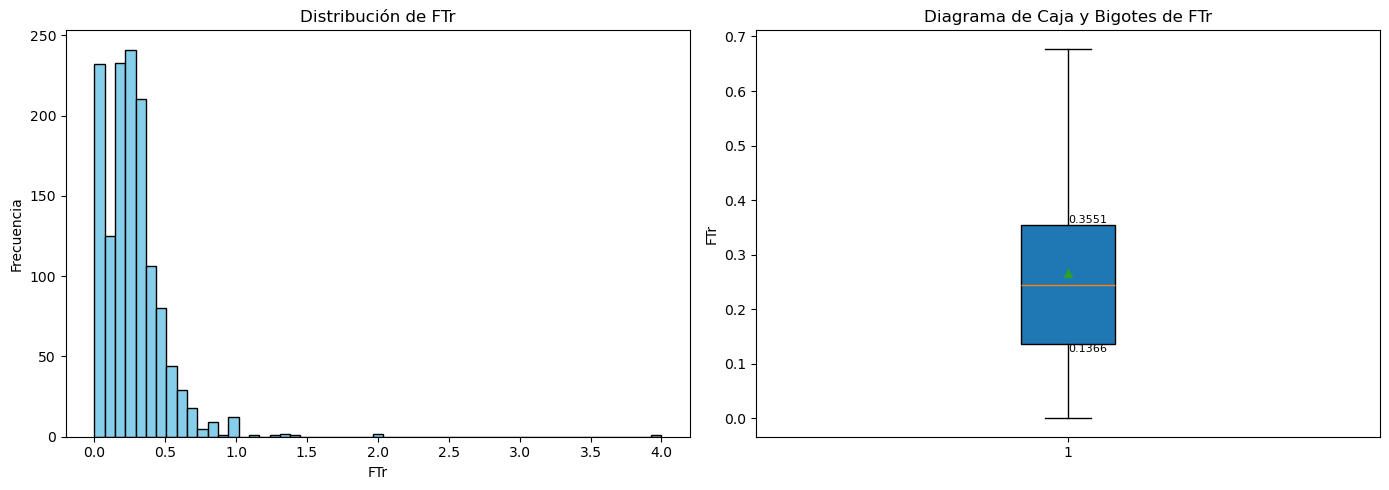

In [11]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'FTr'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.4 Variable *ORB%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 773
Media de la variable: 0.05521064301552105
Mediana de la variable: 0.0401
Desviación típica de la variable: 0.06122867656080771
Valor mínimo: 0.0
Valor máximo: 1.2954


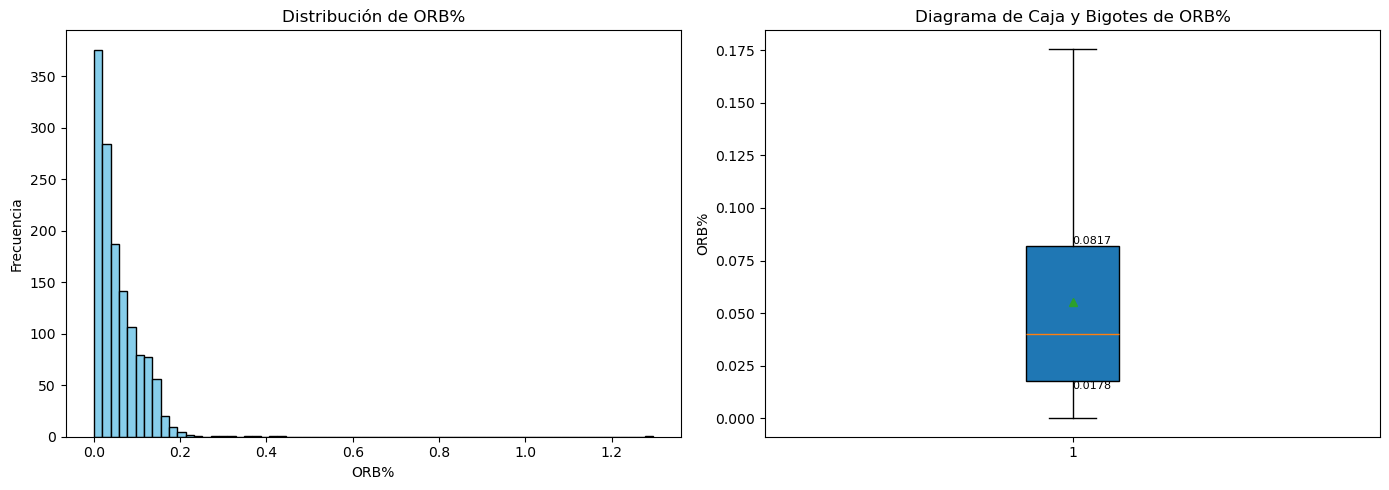

In [12]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'ORB%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.5 Variable *DRB%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 913
Media de la variable: 0.12824028085735403
Mediana de la variable: 0.1209
Desviación típica de la variable: 0.10378895908823461
Valor mínimo: 0.0
Valor máximo: 2.5524


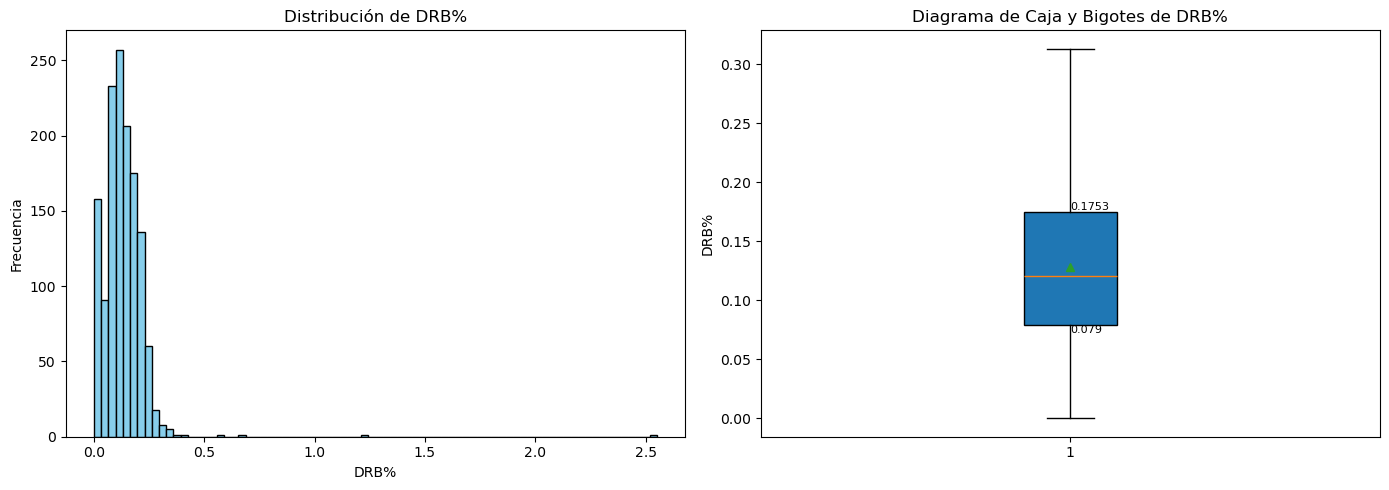

In [13]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'DRB%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.6 Variable *STL%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 339
Media de la variable: 0.01706969696969697
Mediana de la variable: 0.0167
Desviación típica de la variable: 0.013251355785714309
Valor mínimo: 0.0
Valor máximo: 0.152


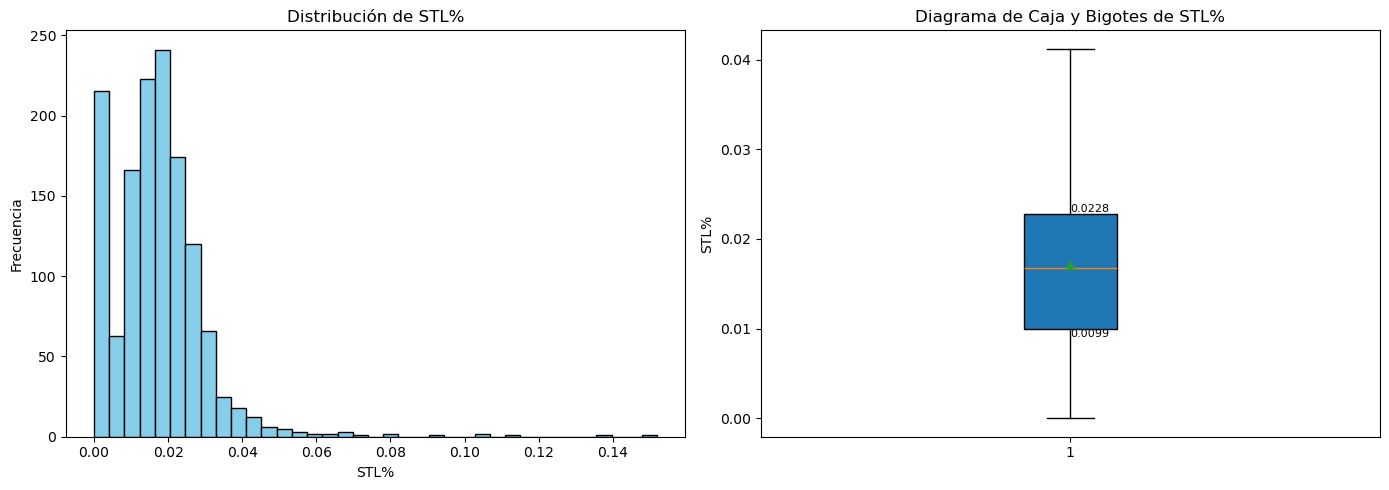

In [14]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'STL%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.7 Variable *BLK%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 393
Media de la variable: 0.013445676274944567
Mediana de la variable: 0.0052
Desviación típica de la variable: 0.02217274629825896
Valor mínimo: 0.0
Valor máximo: 0.3169


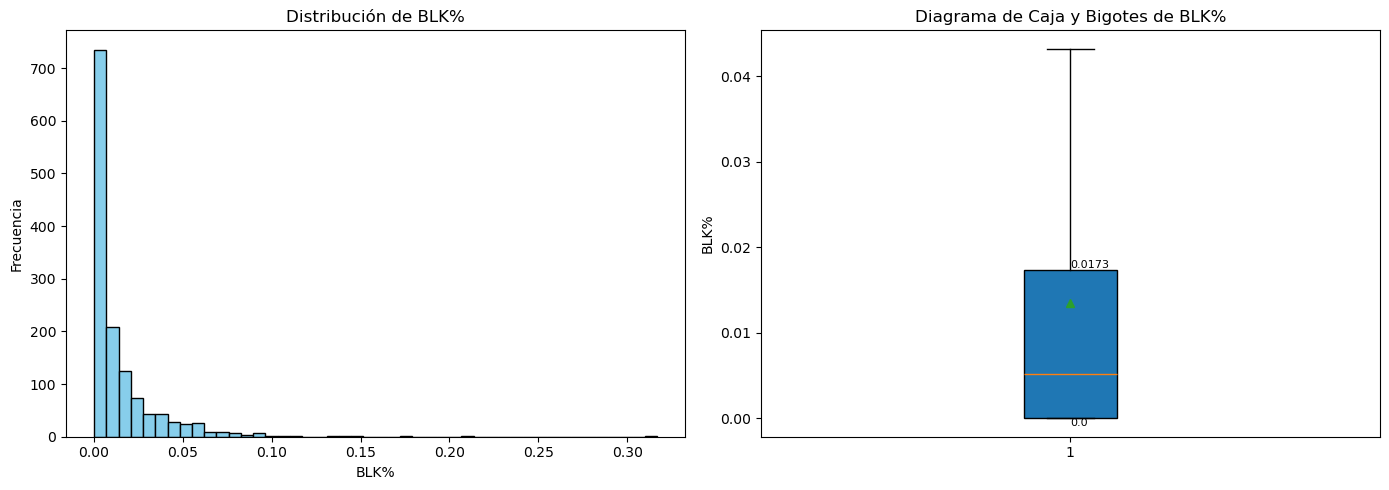

In [15]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'BLK%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.8 Variable *TOV%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 890
Media de la variable: 0.15065218033998523
Mediana de la variable: 0.1452
Desviación típica de la variable: 0.10147057205975098
Valor mínimo: 0.0
Valor máximo: 1.0


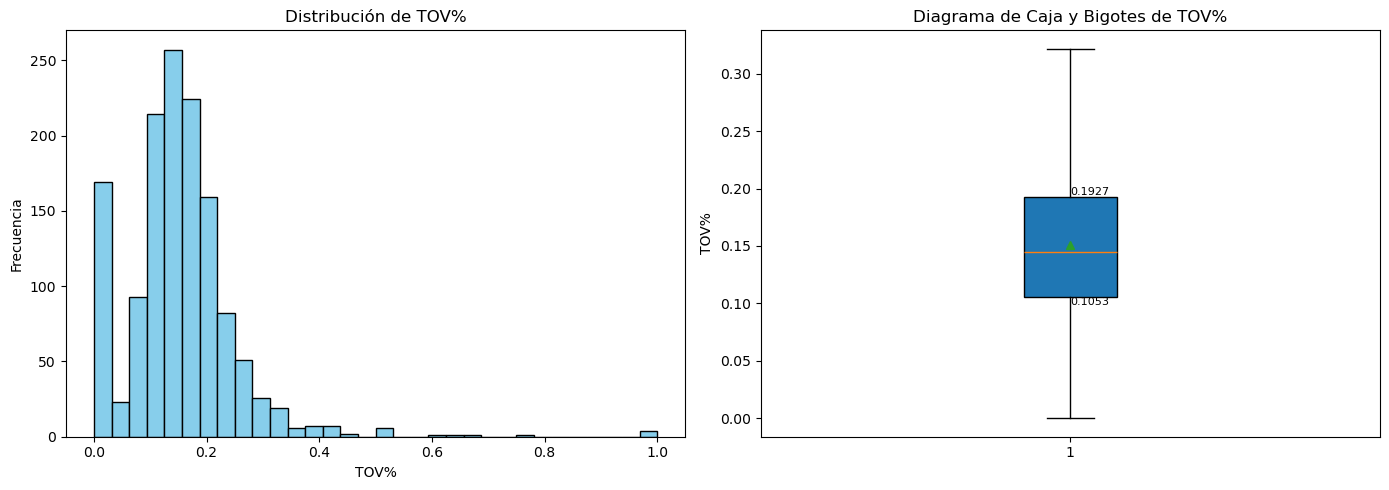

In [16]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'TOV%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.9 Variable *AST%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 770
Media de la variable: 0.05497442719881744
Mediana de la variable: 0.039
Desviación típica de la variable: 0.05074249321562236
Valor mínimo: 0.0
Valor máximo: 0.4522


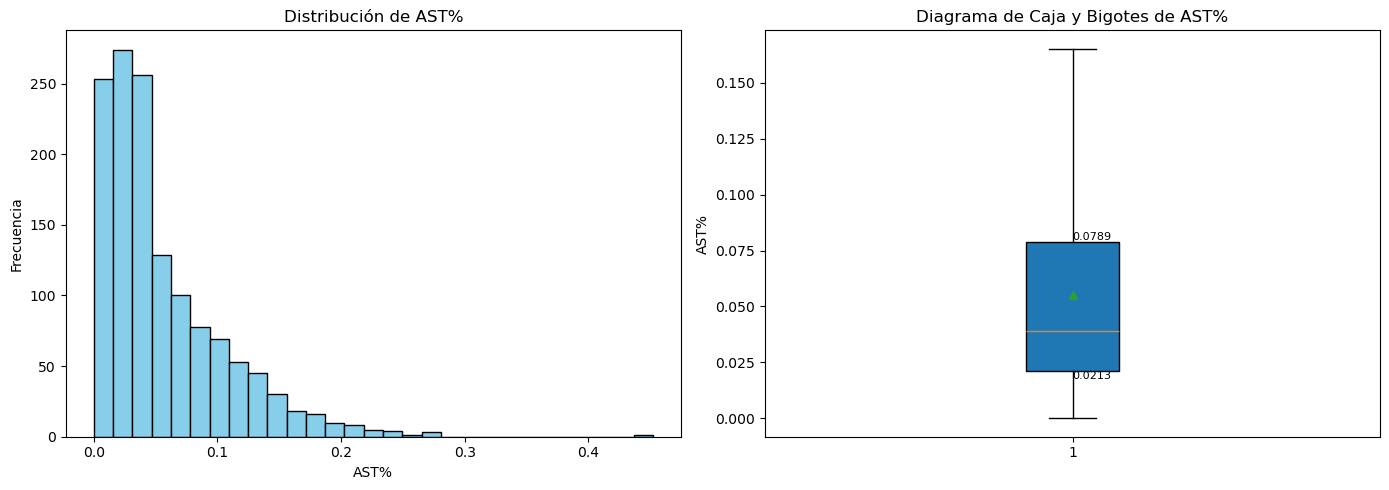

In [17]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'AST%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.10 Variable *USG%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 938
Media de la variable: 0.18181603843311162
Mediana de la variable: 0.1857
Desviación típica de la variable: 0.08302375044256209
Valor mínimo: 0.0
Valor máximo: 0.987


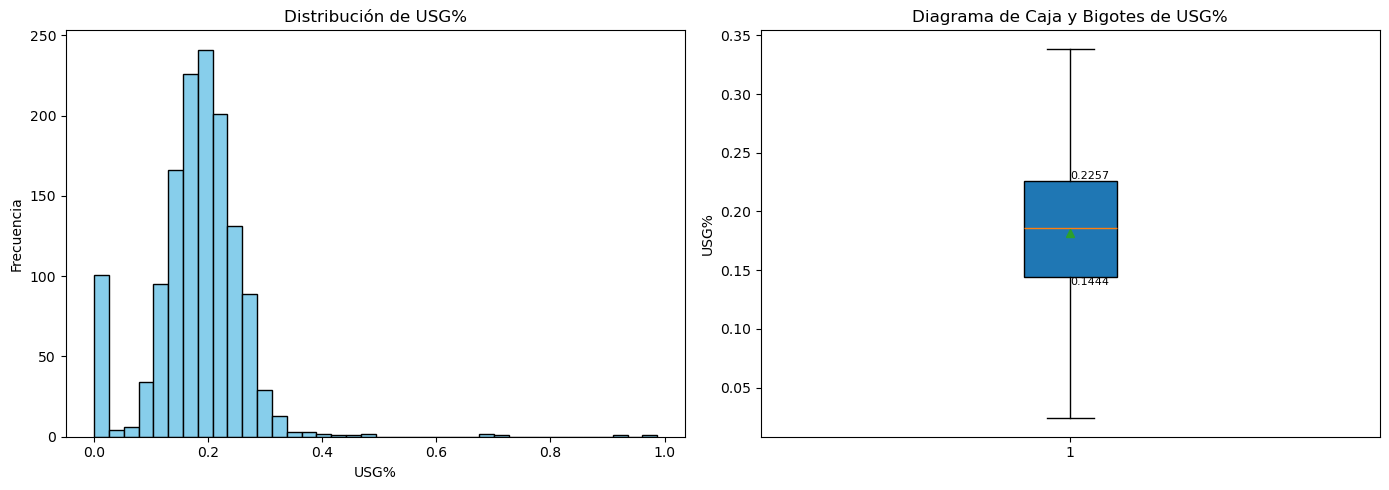

In [18]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'USG%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

### 2.11 Variable *STOP%*

#############################
INFORMACIÖN DE LA VARIABLE
#############################
Tipo de variable: float64
Nº de valores únicos: 1080
Media de la variable: 0.45967472283813743
Mediana de la variable: 0.4557
Desviación típica de la variable: 0.19459751156056168
Valor mínimo: 0.0
Valor máximo: 3.786


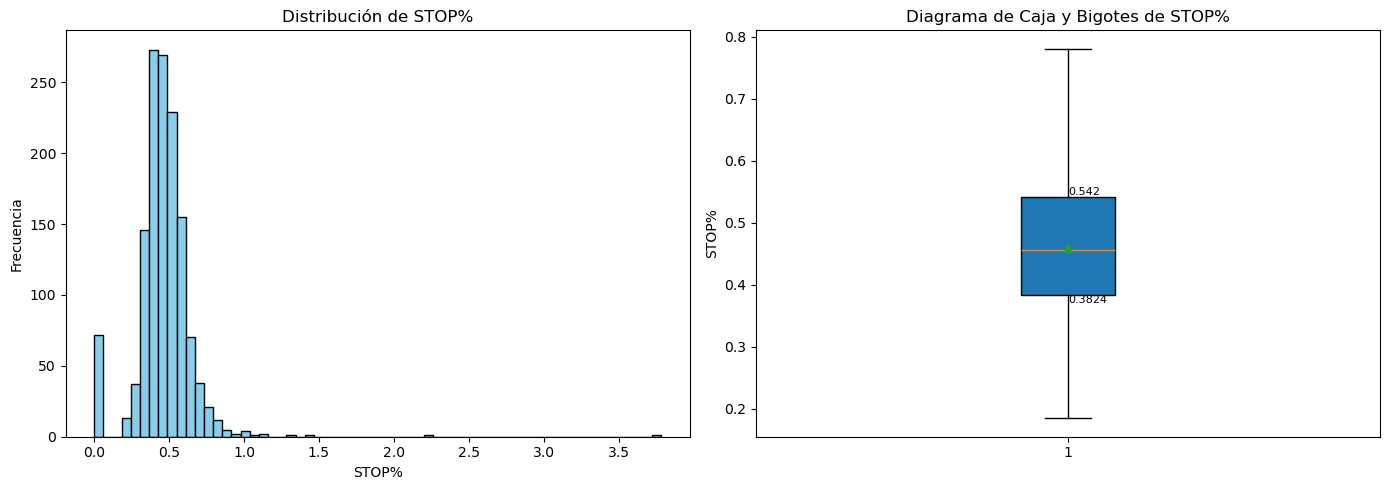

In [19]:
print("#############################")
print("INFORMACIÖN DE LA VARIABLE")
print("#############################")
variable = 'STOP%'
print("Tipo de variable:", df_estadisticas_totales[variable].dtype)
print("Nº de valores únicos:", df_estadisticas_totales[variable].nunique())
print("Media de la variable:", df_estadisticas_totales[variable].mean())
print("Mediana de la variable:", df_estadisticas_totales[variable].median())
print("Desviación típica de la variable:", df_estadisticas_totales[variable].std())
print("Valor mínimo:", df_estadisticas_totales[variable].min())
print("Valor máximo:", df_estadisticas_totales[variable].max())

# Obtención de visualizaciónes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
obtener_distribucion_variable(df_estadisticas_totales, variable, ax1)
obtener_boxplot_variable(df_estadisticas_totales, variable, ax2)
plt.tight_layout()
plt.show()

La variable *MAT* es de tipo numérico int64 y tiene 51 valores únicos. Su valor mínimo es 0 y su valor máximo es 58. La media de la variable es aproximadamente 4.43, y la mediana es 0.0. Esto sugiere una distribución sesgada hacia valores más bajos, con una alta concentración de valores cercanos a cero. La desviación típica de 8.42 indica una variabilidad considerable en los datos.

## 3. Conclusiones

Tras el análisis de todas las variables que constiyen las *estadísticas totales individuales* se pasa a comentar las siguientes conclusiones sobre el conjunto de datos:
* **Estructura de la información.** Como ha sido observado, todas las variables que conforman el conjunto de datos se encuentra en formato numérico (ya sea en formato int64 o float). Además, no ha sido detectado ningún elemento vacío ni nulo dentro de los datos.
* **Distribución y variabilidad en las variables.** De manera general, se ha observado que en todas las variables existe un alto grado de diversidad de valores y un alto grado de variabilidad de valores. Además, también se puede observar de manera generalizada que la media supera a la mediana en las variables lo que indica una tendencia en la variables a cercanos a cero.
* **Incoherencia de variables.** En las variable eFG%, FTr, ORB% y DRB% se ha encontrado valores por encima de 1 cuando estas representan un porcentaje. Estos valores deberán ser eliminados para no tener en cuenta estos datos.

Estos puntos son los más relevantes tras el análisis del conjunto de datos y se tendrán en cuenta para el uso de los datos en los futuros análisis dentro del Trabajo Fin de Máster.